# NLP Utils - Text Classification example: News dataset (Kaggle)

### 0 - Setup

In [1]:
from nlp_utils import *

C:\profili\u382270\Downloads\MyStuff\anaconda2\envs\env1\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
import json

lst_dics = []
with open('data.json', mode='r', errors='ignore') as json_file:
    for dic in json_file:
        lst_dics.append( json.loads(dic) )
        
lst_dics[0]

{'category': 'CRIME',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'authors': 'Melissa Jeltsen',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'short_description': 'She left her husband. He killed their children. Just another day in America.',
 'date': '2018-05-26'}

In [3]:
dtf = pd.DataFrame(lst_dics)
dtf = dtf[ dtf["category"].isin(['ENTERTAINMENT','POLITICS','TECH']) ][["category","headline"]]
dtf = dtf.rename(columns={"category":"y", "headline":"text"})
dtf.head()

,y,text
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...


In [4]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50879 entries, 1 to 200848
Data columns (total 2 columns):
y       50879 non-null object
text    50879 non-null object
dtypes: object(2)
memory usage: 1.2+ MB


### 1 - Text Analysis

###### Look for Metadata
- length
- sentiment

In [5]:
extra_features = []

###### Target Variable

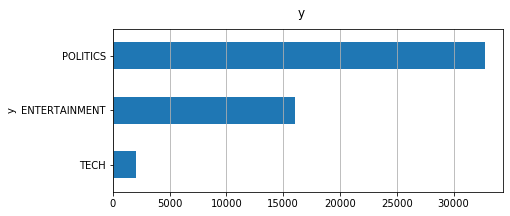

In [6]:
utils_plot_distributions(dtf, x="y", top=None, figsize=(7,3))

In [7]:
# Unbalanced

###### Language

In [8]:
# this takes a while
dtf = add_detect_lang(dtf, "text")

print(" ")
print(dtf["text"].iloc[0], " --> ", dtf["lang"].iloc[0])

      count unique top   freq
lang  50879     32  en  48959
 
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  en


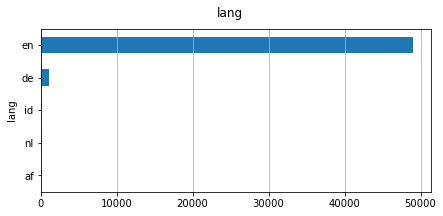

In [9]:
utils_plot_distributions(dtf, x="lang", top=5, figsize=(7,3))

In [10]:
# filter onlzy english
dtf = dtf[dtf["lang"]=="en"]

###### Length

In [11]:
dtf = add_text_count(dtf, "text")

print(" ")
print(dtf["text"].iloc[0], " --> ", dtf["word_count"].iloc[0], "|", dtf["text_length"].iloc[0])

               count       mean        std  min   25%   50%   75%    max
word_count   48959.0  10.389693   2.809545  1.0   9.0  10.0  12.0   44.0
text_length  48959.0  64.113176  16.690976  7.0  54.0  65.0  75.0  295.0
 
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  14 | 75


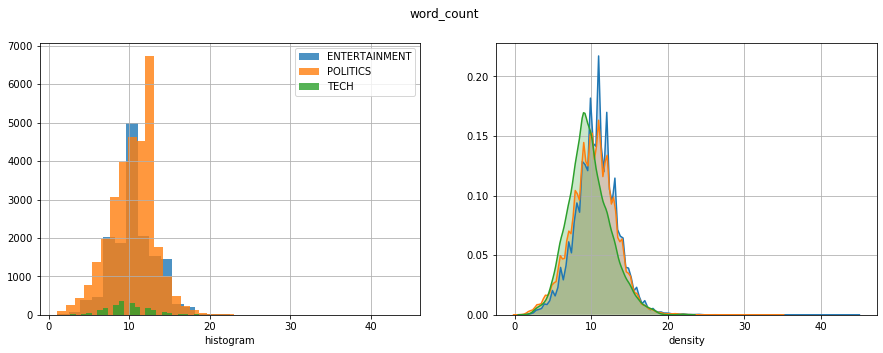

In [12]:
utils_plot_distributions(dtf, x="word_count", y="y", bins=None, figsize=(15,5))

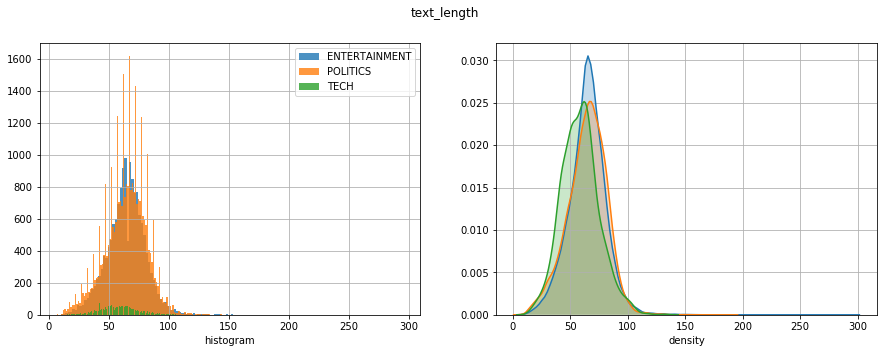

In [13]:
utils_plot_distributions(dtf, x="text_length", y="y", bins=None, figsize=(15,5))

###### Sentiment

In [14]:
dtf = add_sentiment(dtf, "text", algo="textblob", sentiment_range=(-1,1))

print(" ")
print(dtf["text"].iloc[0], " --> ", dtf["sentiment"].iloc[0])

             count      mean       std  min  25%  50%    75%  max
sentiment  48959.0  0.049742  0.257648 -1.0  0.0  0.0  0.125  1.0
 
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  0.0


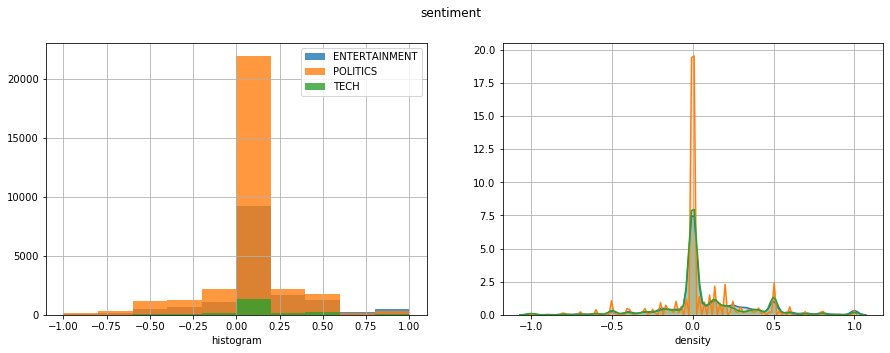

In [15]:
utils_plot_distributions(dtf, x="sentiment", y="y", bins=10, figsize=(15,5))

In [16]:
dtf = add_sentiment(dtf, "text", algo="textblob", sentiment_range=(0,1))

             count      mean       std  min  25%  50%     75%  max
sentiment  48959.0  0.524871  0.128824  0.0  0.5  0.5  0.5625  1.0


###### Ner

In [17]:
ner = spacy.load("en_core_web_lg")

In [18]:
ner_displacy(dtf["text"].iloc[0], ner=ner, lst_filter_tags=None, title=None)

In [19]:
# this takes a while
dtf = add_ner_spacy(dtf, "text", ner=ner, unique=False, create_features=True, 
                    tag_type=["ORG","PERSON","NORP","GPE","LOC","FAC","EVENT","PRODUCT","WORK_OF_ART"])

print(dtf["text"].iloc[0], " --> ", dtf["tags"].iloc[0])

--- tagging done ---
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  [{('Will Smith', 'PERSON'): 1}, {('Diplo', 'PERSON'): 1}, {('Nicky Jam', 'PERSON'): 1}, {("The 2018 World Cup's", 'EVENT'): 1}]


--- ENTERTAINMENT ---


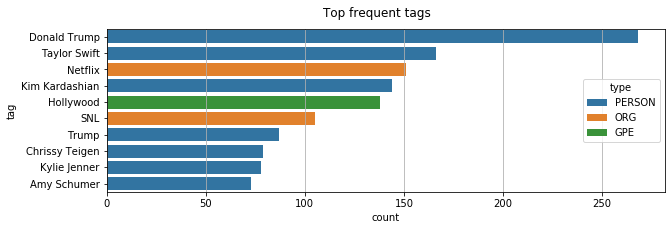

--- POLITICS ---


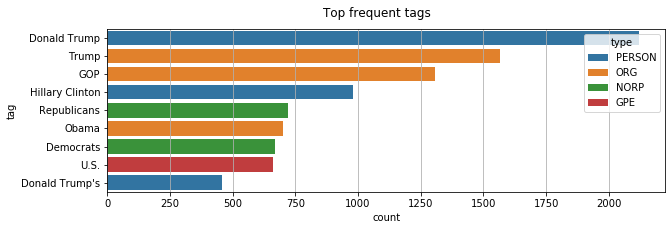

--- TECH ---


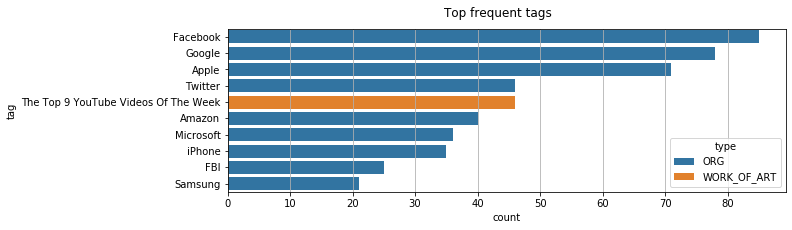

In [20]:
for y in dtf["y"].unique():
    print("---", y, "---")
    common_tags = tags_freq(dtf[dtf["y"]==y], "tags", top=10, figsize=(10,3))

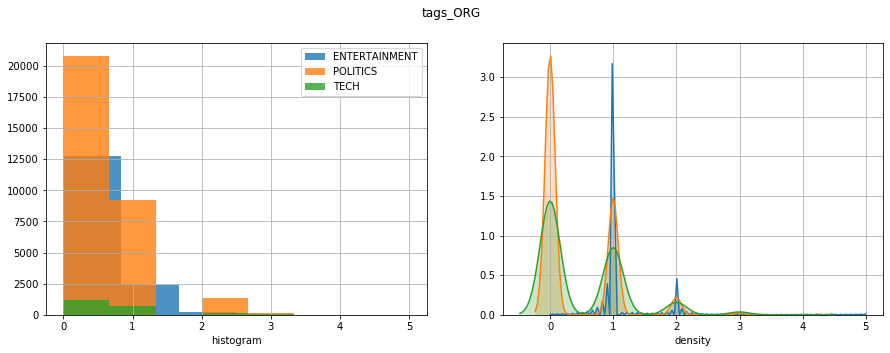

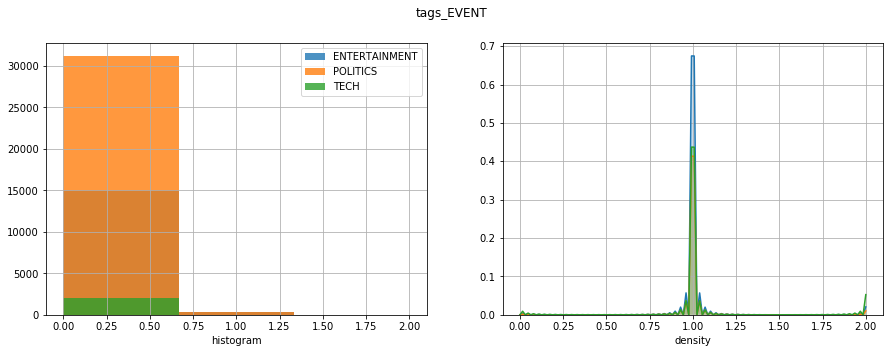

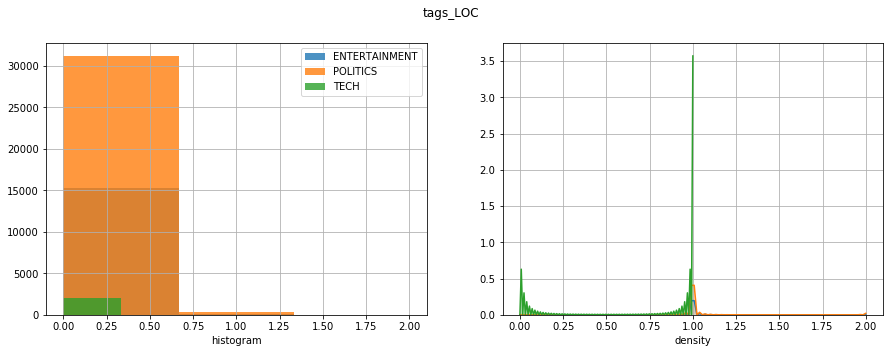

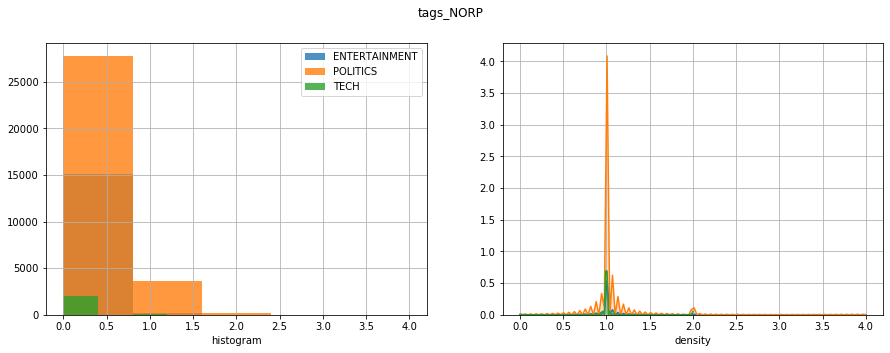

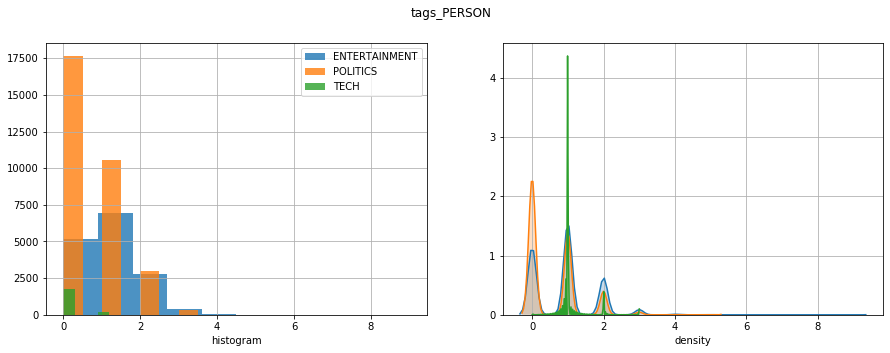

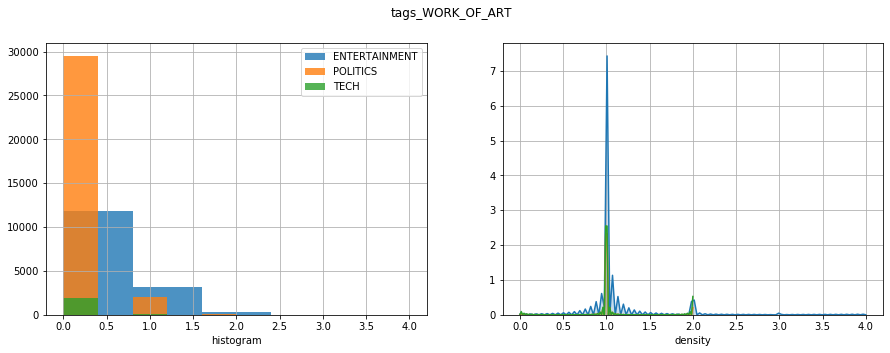

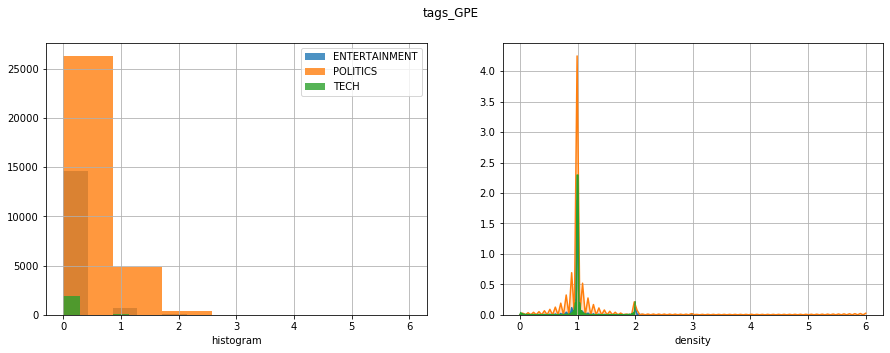

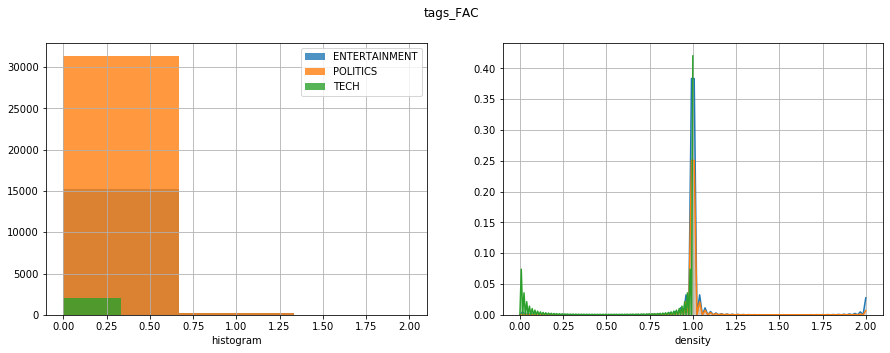

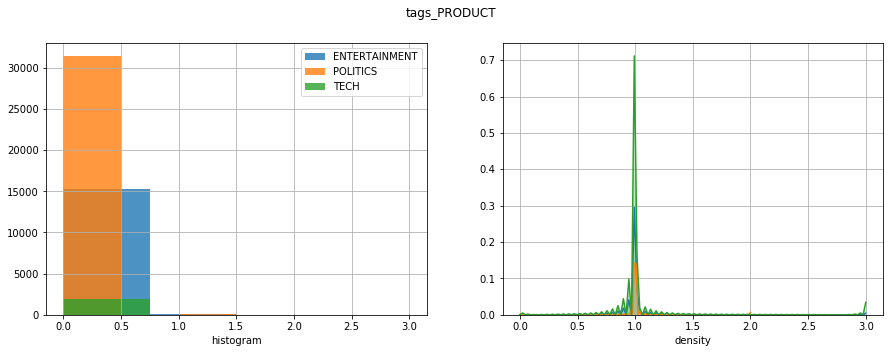

In [21]:
for x in dtf.filter(like="tags_", axis=1).columns:
    utils_plot_distributions(dtf, x=x, y="y", bins=None, figsize=(15,5))

###### Clean Words

In [22]:
lst_stopwords = create_stopwords(["english"], lst_new_words=["dtype","say","new","length","object","u","ha","wa"])

In [23]:
dtf = add_preprocessed_text(dtf, "text", lst_regex=None, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords)

print(dtf["text"].iloc[0], " --> ", dtf["text_clean"].iloc[0])

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  smith join diplo nicky jam 2018 world cup official song


--- ENTERTAINMENT ---


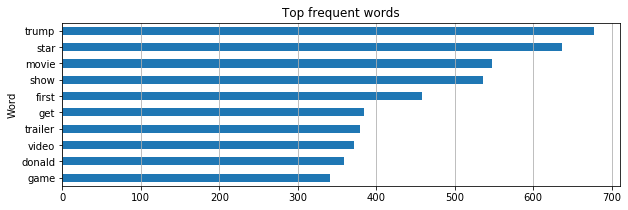

--- POLITICS ---


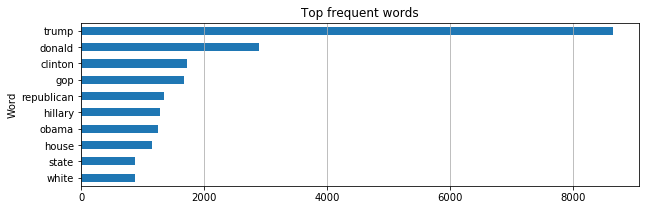

--- TECH ---


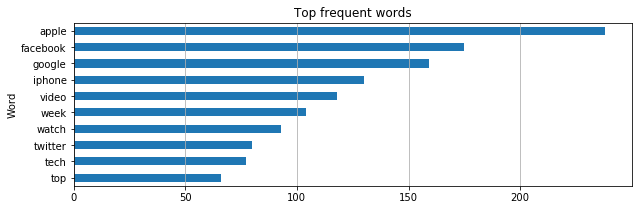

In [24]:
for y in dtf["y"].unique():
    print("---", y, "---")
    words_freq(dtf[dtf["y"]==y], "text_clean", top=10, figsize=(10,3))

--- ENTERTAINMENT ---


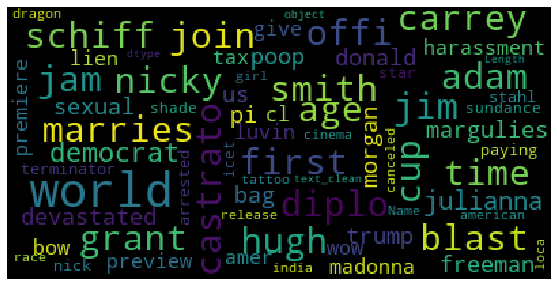

--- POLITICS ---


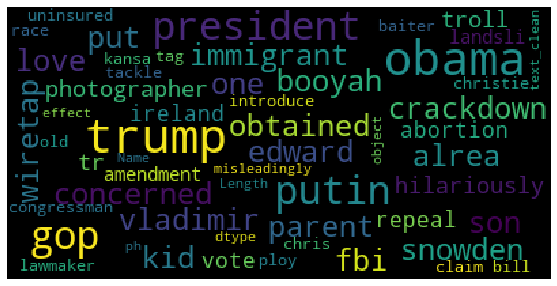

--- TECH ---


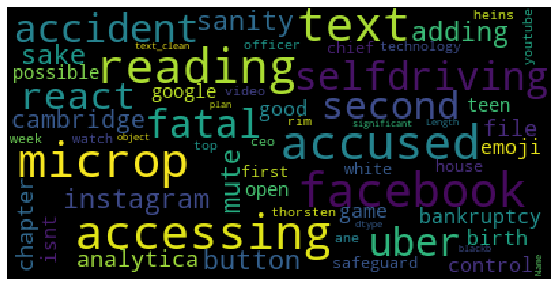

In [25]:
for y in dtf["y"].unique():
    print("---", y, "---")
    plot_wordcloud(corpus=dtf[dtf["y"]==y]["text_clean"], max_words=150, max_font_size=35, figsize=(10,5))

###### Summary

In [26]:
#dtf_Xextra

### 2 - Preprocessing

###### Partitioning

In [27]:
from sklearn import model_selection

dtf_train, dtf_test = model_selection.train_test_split(dtf, test_size=0.3, random_state=123, shuffle=False)

print("train:", dtf_train.shape)
print("test:", dtf_test.shape)

train: (34271, 17)
test: (14688, 17)


### 3 - Baseline (Bag of Words + ML)

###### Features Engineering

In [28]:
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

--- creating sparse matrix ---
shape: (34271, 10000)
--- creating vocabulary ---
len: 10000
--- tokenization ---
len: 34271


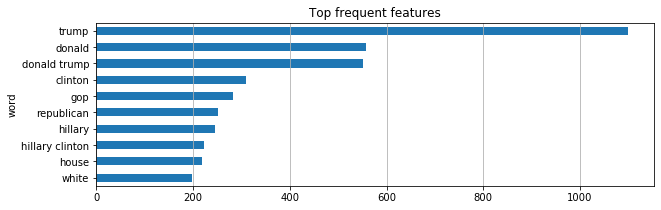

In [29]:
dic_bow = fit_bow(corpus=dtf_train["text_clean"], vectorizer=vectorizer, top=10, figsize=(10,3))

X_train, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [30]:
print("from: ", dtf_train["text_clean"].iloc[0], "| len:", len(dtf_train["text_clean"].iloc[0].split()))
print("to: ", lst_text2tokens[0], "| len:", len(lst_text2tokens[0]))
print("check: ", dtf_train["text_clean"].iloc[0].split()[0], " -- idx in vocabolary -->", 
      dic_vocabulary[dtf_train["text_clean"].iloc[0].split()[0]])

from:  smith join diplo nicky jam 2018 world cup official song | len: 10
to:  [8022, 4653, 4526, 60, 9884, 2120, 6073, 8076] | len: 8
check:  smith  -- idx in vocabolary --> 8022


###### Features Selection

In [31]:
dic_features_selection = features_selection(X_train, y=dtf_train["y"], vectorizer_fitted=vectorizer, top=None)

# ENTERTAINMENT:
  . trump
  . star
  . trailer
  . movie
  . oscar
 
# POLITICS:
  . trump
  . star
  . trailer
  . movie
  . season
 
# TECH:
  . apple
  . facebook
  . iphone
  . google
  . tech
 


In [32]:
dtf_X_train = sparse2dtf(X_train, dic_vocabulary, lst_words=dic_features_selection["ALL"])

In [33]:
dtf_train = pd.concat([dtf_train, dtf_X_train.set_index(dtf_train.index)], axis=1)

print(dtf_train.shape)
dtf_train.head(3)

(34271, 3158)


,y,text,lang,word_count,text_length,sentiment,tags,tags_ORG,tags_EVENT,tags_LOC,...,X_buy,X_vanessa,X_stephen,X_trevor,X_anatomy,X_thing season,X_white house,X_badass,X_kathy,X_performance
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en,14,75,0.500000,"[{('Will Smith', 'PERSON'): 1}, {('Diplo', 'PE...",0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en,10,47,0.625000,"[{('Hugh Grant Marries', 'PERSON'): 1}]",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en,11,69,0.568182,"[{('Jim Carrey', 'PERSON'): 1}, {('Adam Schiff...",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Preprocess Test

In [34]:
X_test = vectorizer.transform(dtf_test["text_clean"])
dtf_X_test = sparse2dtf(X_test, dic_vocabulary, lst_words=dic_features_selection["ALL"])

In [35]:
dtf_test = pd.concat([dtf_test, dtf_X_test.set_index(dtf_test.index)], axis=1)

print(dtf_test.shape)
dtf_test.head(3)

(14688, 3158)


,y,text,lang,word_count,text_length,sentiment,tags,tags_ORG,tags_EVENT,tags_LOC,...,X_buy,X_vanessa,X_stephen,X_trevor,X_anatomy,X_thing season,X_white house,X_badass,X_kathy,X_performance
76797,POLITICS,"Jeb Bush Thinks Supergirl Is 'Kind Of' Hot, In...",en,13,75,0.7125,"[{('Jeb Bush', 'PERSON'): 1}]",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76799,ENTERTAINMENT,Jeremy Renner Says It's 'Not His Job' To Help ...,en,14,86,0.5000,"[{('Jeremy Renner', 'PERSON'): 1}, {('Stars Ne...",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76800,POLITICS,Trey Gowdy: The 'Real Tragedy' Is Past Benghaz...,en,14,94,0.4875,"[{('Trey Gowdy', 'PERSON'): 1}, {('Hillary Cli...",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Train

In [36]:
X_train = dtf_train.drop(["y","text","text_clean","tags","lang"], axis=1).values
y_train = dtf_train["y"].values
X_test = dtf_test.drop(["y","text","text_clean","tags","lang"], axis=1).values
y_test = dtf_test["y"].values

In [37]:
classifier = naive_bayes.MultinomialNB()

In [38]:
dic_model = ml_text_classif(X_train, y_train, X_test, y_test, preprocessing=False, vectorizer=None, classifier=classifier)
predicted_prob, predicted = dic_model["predicted_prob"], dic_model["predicted"]

True: POLITICS
Pred: POLITICS 0.9646146710754903
Accuracy (overall correct predictions): 0.809
Detail:
               precision    recall  f1-score   support

ENTERTAINMENT       0.93      0.75      0.83      6452
     POLITICS       0.74      0.97      0.84      7173
         TECH       0.93      0.06      0.11      1063

     accuracy                           0.81     14688
    macro avg       0.87      0.59      0.59     14688
 weighted avg       0.84      0.81      0.78     14688



###### Evaluate

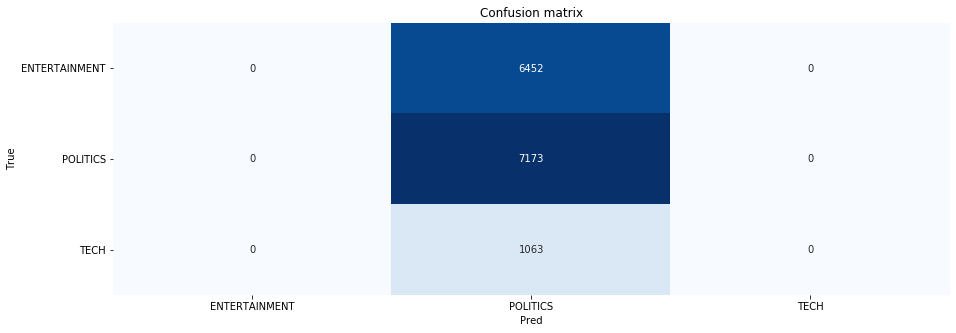

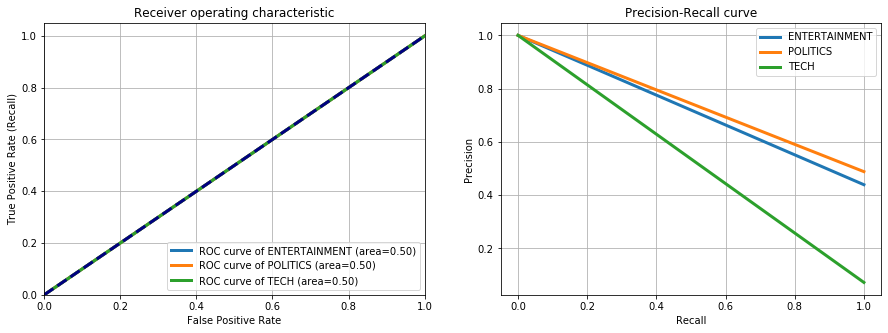

In [61]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))

### 4 - Model Desing & Testing (pre-trained Embeddings + DL)

###### I already have:
- dtf_train --> x=text_clean, y must be encoded
- NB! I need a new vectorizer cuz the one in Baseline has ngrams=(1,2)

In [40]:
dtf_train, dic_y_mapping = encode_variable(dtf_train, "y")
print(dic_y_mapping)

{0: 'ENTERTAINMENT', 1: 'POLITICS', 2: 'TECH'}


###### Features Engineering

In [41]:
# create input for lstm (sequences of tokens)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=None, ngram_range=(1,1))

In [42]:
X_train, dic_vocabulary = text2seq(corpus=dtf_train["text_clean"], vectorizer=vectorizer)

--- creating sparse matrix ---
shape: (34271, 20626)
--- creating vocabulary ---
len: 20626
--- tokenization ---
len: 34271
--- padding to sequence ---
shape: (34271, 36)


In [43]:
print("from: ", dtf_train["text_clean"].iloc[0], "| len:", len(dtf_train["text_clean"].iloc[0].split()))
print("to: ", X_train[0], "| len:", len(X_train[0]))

from:  smith join diplo nicky jam 2018 world cup official song | len: 10
to:  [20626 20626 20626 20626 20626 20626 20626 20626 20626 20626 20626 20626
 20626 20626 20626 20626 20626 20626 20626 20626 20626 20626 20626 20626
 20626 20626 17080 10035  5439 12575  9876   202 20364  4691 12935 17225] | len: 36


In [44]:
# create weights for lstm (embeddings of tokens)
nlp = gensim_api.load("glove-wiki-gigaword-300")

In [45]:
embeddings = vocabulary_embeddings(dic_vocabulary, nlp, dim_space=300)

shape:  (20627, 300)


In [46]:
word = dtf_train["text_clean"].iloc[0].split()[0]
print("word:", word)
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, "|vector")

word: smith
dic[word]: 17080 |idx
embeddings[idx]: (300,) |vector


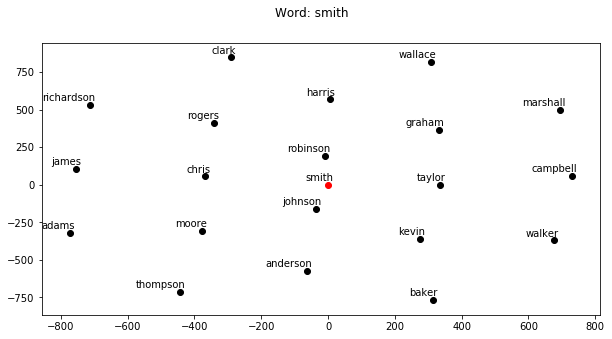

In [47]:
plot_w2v(nlp, plot_type="2d", word=word, top=20, figsize=(10,5))

###### Preprocess Test

In [48]:
X_test, _ = text2seq(corpus=dtf_test["text_clean"], vectorizer=vectorizer, vocabulary=dic_vocabulary, 
                     maxlen=X_train.shape[1])

--- creating sparse matrix ---
shape: (14688, 20626)
--- used vocabulary ---
len: 20626
--- tokenization ---
len: 14688
--- padding to sequence ---
shape: (14688, 36)


###### Train

In [49]:
y_train = dtf_train["y"].values
y_test = dtf_test["y"].values

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 36, 300)           6188100   
_________________________________________________________________
lstm (LSTM)                  (None, 36)                48528     
_________________________________________________________________
dense (Dense)                (None, 3)                 111       
Total params: 6,236,739
Trainable params: 48,639
Non-trainable params: 6,188,100
_________________________________________________________________
None


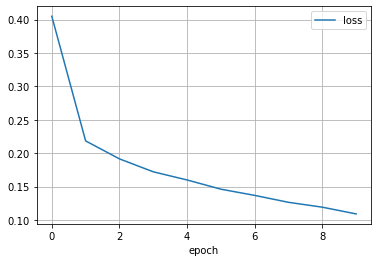

Check --> True: POLITICS Pred: POLITICS Prob: 0.9614924
Accuracy (overall correct predictions): 0.878
Detail:
               precision    recall  f1-score   support

ENTERTAINMENT       0.91      0.87      0.89      6452
     POLITICS       0.85      0.95      0.90      7173
         TECH       0.91      0.41      0.57      1063

     accuracy                           0.88     14688
    macro avg       0.89      0.75      0.79     14688
 weighted avg       0.88      0.88      0.87     14688



In [50]:
# this takes a while
dic_lstm = dl_text_classif(dic_y_mapping, embeddings, X_train, y_train, X_test, y_test, 
                           model=None, epochs=10, batch_size=256)

predicted_prob, predicted = dic_lstm["predicted_prob"], dic_lstm["predicted"]

###### Evaluate

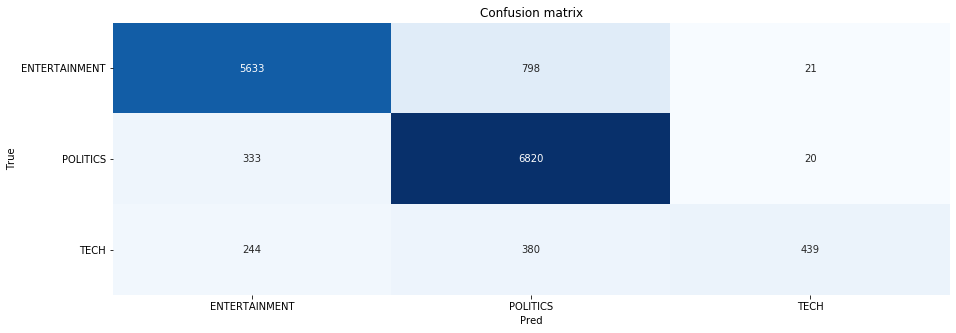

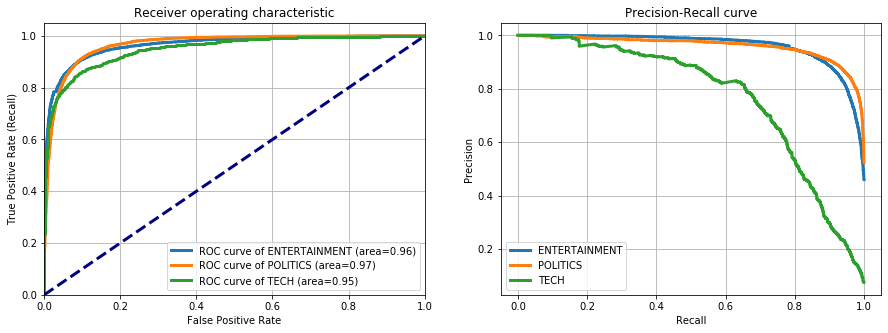

In [55]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))

### 5 - Model Desing & Testing (training Embeddings from scratch + DL)

###### Plan:
- I will just create a new nlp model using all data
- create new Embeddings array with the new nlp model and the same vocabulary
- the rest of the process is the same as before

###### Train Word2Vec

In [122]:
np.max([len(text.split()) for text in dtf["text_clean"]]) /2 

18.0

In [119]:
lst_bigrams_stopwords = ["of","with","without","and","or","the","a"]

In [77]:
nlp = fit_w2v(corpus=dtf["text_clean"], ngrams=1, min_count=1, size=300, window=18, sg=0, epochs=30, 
              lst_bigrams_stopwords=lst_bigrams_stopwords)

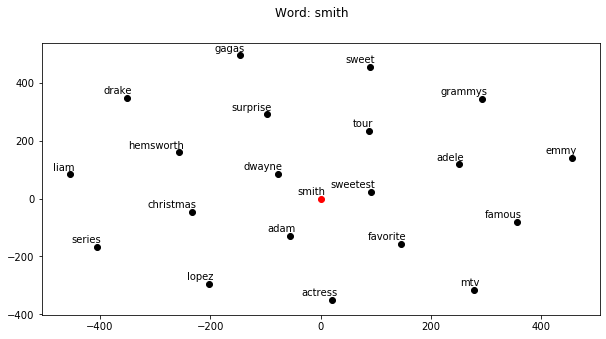

In [82]:
plot_w2v(nlp, plot_type="2d", word=word, top=20, figsize=(10,5))

In [79]:
embeddings = vocabulary_embeddings(dic_vocabulary, nlp, dim_space=300)

shape:  (20627, 300)


###### Train

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 36, 300)           6188100   
_________________________________________________________________
lstm_3 (LSTM)                (None, 36)                48528     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 111       
Total params: 6,236,739
Trainable params: 48,639
Non-trainable params: 6,188,100
_________________________________________________________________
None


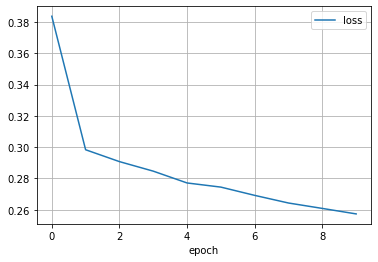

Check --> True: POLITICS Pred: POLITICS Prob: 0.9589536
Accuracy (overall correct predictions): 0.813
Detail:


C:\profili\u382270\Downloads\MyStuff\anaconda2\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

ENTERTAINMENT       0.83      0.82      0.83      6452
     POLITICS       0.80      0.92      0.86      7173
         TECH       0.00      0.00      0.00      1063

     accuracy                           0.81     14688
    macro avg       0.54      0.58      0.56     14688
 weighted avg       0.76      0.81      0.78     14688



In [80]:
# this takes a while
dic_lstm = dl_text_classif(dic_y_mapping, embeddings, X_train, y_train, X_test, y_test, 
                           model=None, epochs=10, batch_size=256)

predicted_prob, predicted = dic_lstm["predicted_prob"], dic_lstm["predicted"]

###### Evaluate

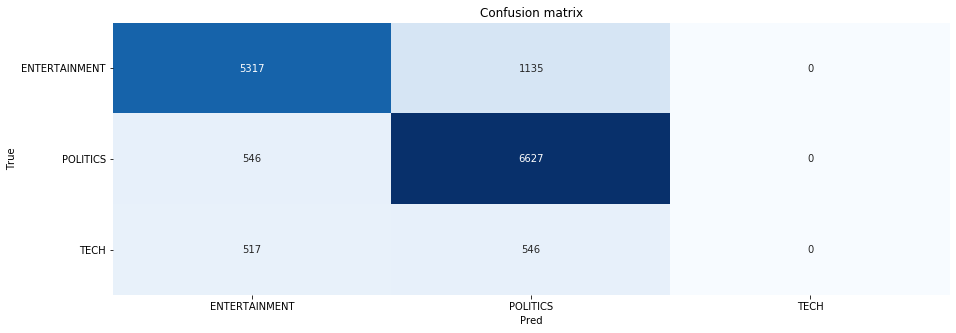

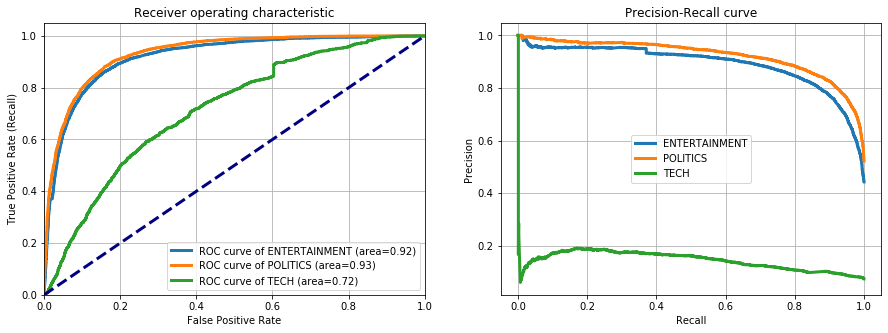

In [81]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))

### 6 - Model Desing & Testing (Clustering)

###### Plan:
- I will use the nlp model to create clusters for the classes
- then convert news into vectors and calculate distances

######  Create Clusters

In [83]:
def utils_preprocess_ngrams(corpus, ngrams=1, grams_join=" "):
    lst_corpus = []
    for string in corpus:
        lst_words = string.split()
        lst_grams = [grams_join.join(lst_words[i:i + ngrams]) for i in range(0, len(lst_words), ngrams)]
        lst_corpus.append(lst_grams)
    return lst_corpus

In [108]:
lst_corpus = utils_preprocess_ngrams(dtf_train["text_clean"], ngrams=1)